# Workflow

This task is mostly about the Data Science leading up to the Machine Learning. Meaning there is no machine learning, but rather just gathering insight from the data.

The workflow I've chosen to follow for this task is:
- The "What"/ what do we want to predict
- Acquire data
- My hypothesis
- Data preprocessing
- Data Analysis

### The "What"
Predict, with the help of regression, the price of healthcare. This would be the end goal, but in this task I never get to this point of actually creating a model.

### Acquire data
For this task I've chosen to use the Kaggle Medical Cost Personal Datasets. Good explanation of the data: https://www.kaggle.com/datasets/mirichoi0218/insurance

### My hypothesis
My hypothesis for this dataset is that age, bmi and smoker will have the biggest impact on someone's medical cost

### Data preprocessing
This part is all about getting to know and fixing the data. This often consist of handling missing value, normalizing real values, encoding categorical data, etc.

### Data Analysis
When doing the data analysis our goal is to extract insight and correlations from the data by using a combination of statistics and visual representations

In [16]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# Load dataset
df = pd.read_csv('insurance.csv')

## Data preprocessing

In [18]:
df.shape

(1338, 7)

In [19]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [21]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [22]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [23]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


## Cleaning the dataset

In [24]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [25]:
# Encoding to be represented by either ones or zeroes
df['sex'] = df['sex'].replace(['female', 'male'], [0,1])
df['smoker'] = df['smoker'].replace(['no', 'yes'], [0,1])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [26]:
df['sex'] =  df['sex'].astype('category')
df['smoker'] =  df['smoker'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   object  
 6   charges   1338 non-null   float64 
dtypes: category(2), float64(2), int64(2), object(1)
memory usage: 55.2+ KB


In [27]:
# NEED TO: BIN AGE, BMI and CHARGES

def bins(df):
    pass

def min_max_normalizing(df):
    df_copy = df.copy()

    # df_copy['age'] = (df_copy['age'] - df_copy['age'].min()) / \
    #                   (df_copy['age'].max() - df_copy['age'].min())
    #
    # df_copy['bmi'] = (df_copy['bmi'] - df_copy['bmi'].min()) / \
    #                   (df_copy['bmi'].max() - df_copy['bmi'].min())

    df_copy['charges'] = (df_copy['charges'] - df_copy['charges'].min()) / \
                      (df_copy['charges'].max() - df_copy['charges'].min())

    return df_copy

# Z-score Normalizing
def z_score_normalizing(df):
    df_copy = df.copy()

    # df_copy['age'] = (df_copy['age'] - df_copy['age'].mean()) / df_copy['age'].std()
    # df_copy['bmi'] = (df_copy['bmi'] - df_copy['bmi'].mean()) / df_copy['bmi'].std()
    df_copy['charges'] = (df_copy['charges'] - df_copy['charges'].mean()) / df_copy['charges'].std()

    return df_copy

df_z_score = z_score_normalizing(df)

# df = min_max_normalizing(df)
#
# df

# EDA

## Feature Correlation Investigation

As you can see there is a decent difference between Male(13956) and Female(12569).
From the data we have available this can come from mainly two different reasons:
- Men smoking more, which you will see raises the cost by a lot
- Men have a higher BMI, which you will see raises the cost by also a lot

In [28]:
df[['sex', 'charges']].groupby(['sex'], as_index=False).mean().sort_values(by='charges', ascending=False)

,sex,charges
1,1,13956.751178
0,0,12569.578844


In [30]:
# NEED TO BIN BMI AND OR CHARGES
# df[['bmi', 'charges']].groupby(['sex'], as_index=False).mean().sort_values(by='charges', ascending=False)

In [31]:
df[['smoker', 'charges']].groupby(['smoker'], as_index=False).mean().sort_values(by='charges', ascending=False)

,smoker,charges
1,1,32050.231832
0,0,8434.268298


In [29]:
df[['smoker', 'sex']].groupby(['smoker'], as_index=False).mean().sort_values(by='smoker', ascending=False)

C:\Users\marku\AppData\Local\Temp\ipykernel_9576\2291323539.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  df[['smoker', 'sex']].groupby(['smoker'], as_index=False).mean().sort_values(by='smoker', ascending=False)


,smoker
1,1
0,0


Here you can see that the number of children doesn't have a strong positive correlation with charges. I think I can conclude with this not being an important variable for the cost, but will do further investigation.

In [32]:
df[['children', 'charges']].groupby(['children'], as_index=False).mean().sort_values(by='charges', ascending=False)

,children,charges
3,3,15355.318367
2,2,15073.563734
4,4,13850.656311
1,1,12731.171832
0,0,12365.975602
5,5,8786.035247


There's a big difference in cost between southeast and southwest, and between northeast and northwest.

In [33]:
df[['region', 'charges']].groupby(['region'], as_index=False).mean().sort_values(by='charges', ascending=False)

,region,charges
2,southeast,14735.411438
0,northeast,13406.384516
1,northwest,12417.575374
3,southwest,12346.937377


In [35]:
df = pd.get_dummies(df)

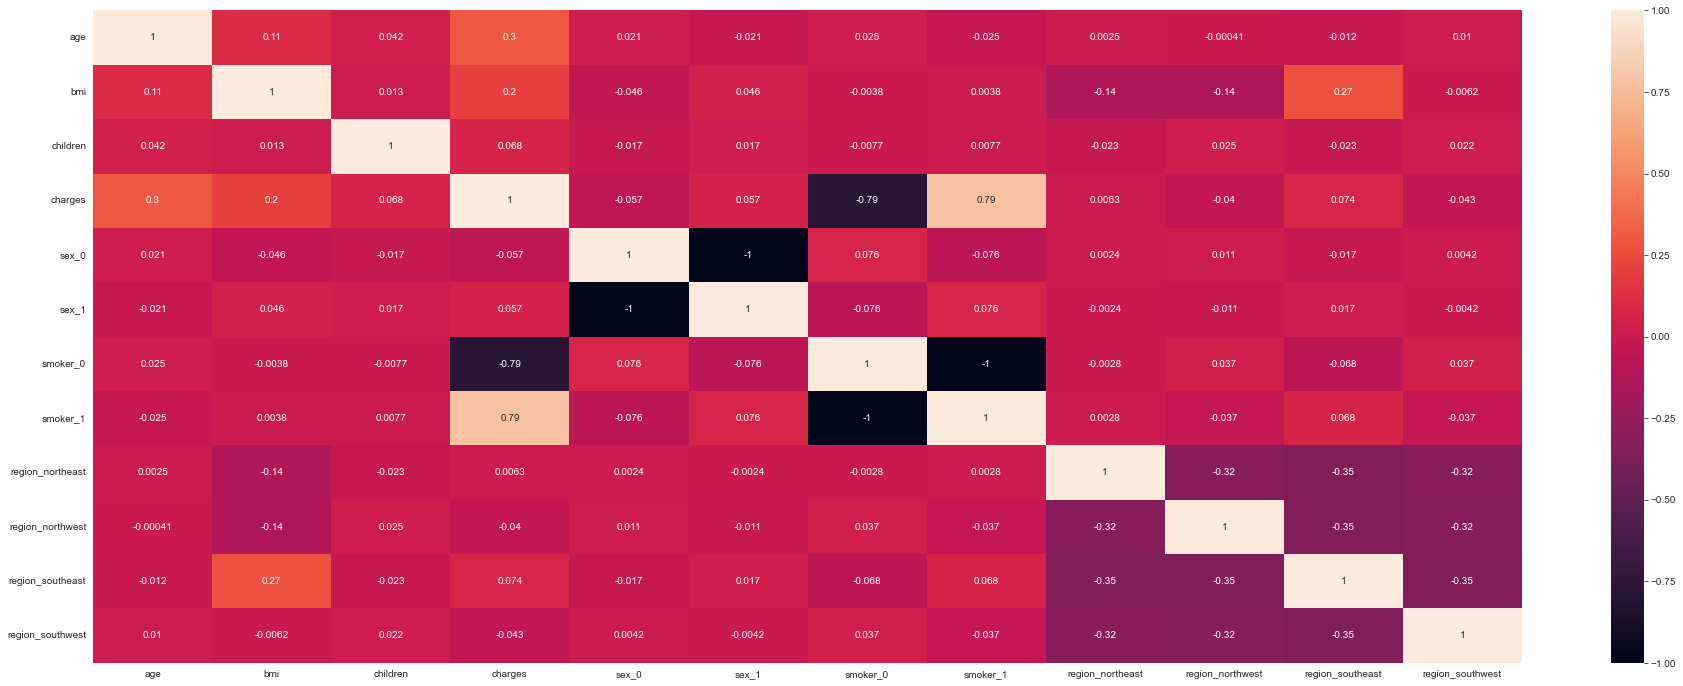

In [36]:
corr = df.corr()
plt.figure(figsize=(32, 12))
heatmap = sns.heatmap(corr, annot=True)

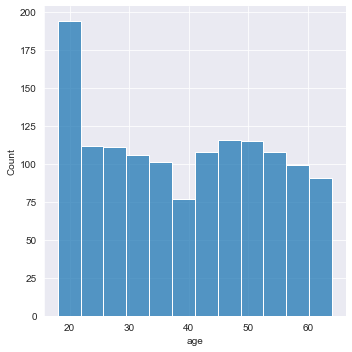

In [38]:
sns.displot(df, x=df['age'])

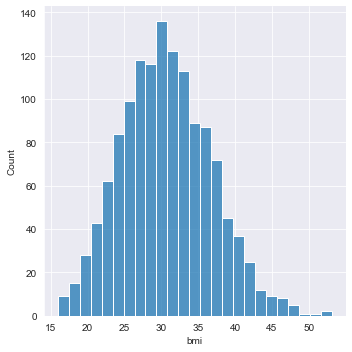

In [40]:
sns.displot(df, x=df['bmi'])

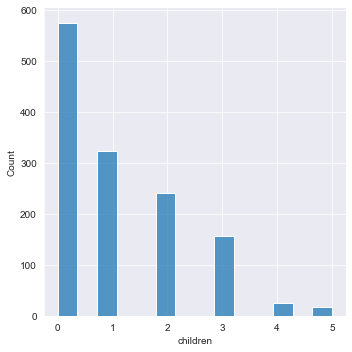

In [45]:
sns.displot(df, x=df['children'])

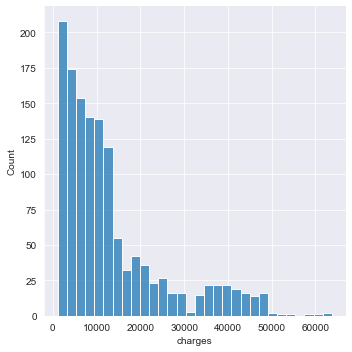

In [46]:
sns.displot(df, x=df['charges'])

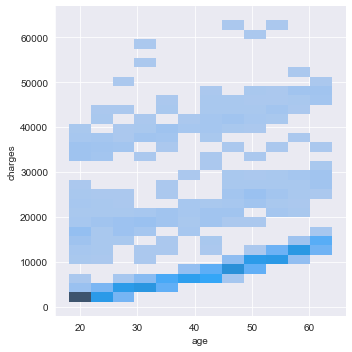

In [50]:
sns.displot(df, y=df['charges'], x=df['age'])